<a href="https://colab.research.google.com/github/CesarAllende88/Funciones_aux/blob/master/Proyecto5Worldcup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno

In [0]:
partidos=pd.read_csv("/content/drive/My Drive/proyecto5/WorldCupMatches.csv")
jugadores=pd.read_csv("/content/drive/My Drive/proyecto5/WorldCupPlayers.csv")
copas=pd.read_csv("/content/drive/My Drive/proyecto5/WorldCups.csv")


In [0]:
partidos = partidos.rename(columns={'Year':'Año','Datetime':'Fecha/Hora','Stage':'Etapa','Stadium':'Estadio','City':'Ciudad','Home Team Name':'Nombre Equipo Local',
                                    'Home Team Goals':'Goles equipo local','Away Team Goals':'Goles equipo visitante','Away Team Name':'Nombre equipo visitante','Win conditions':'Condiciones de ganar',
                                    'Attendance':'Asistencia','Half-time Home Goals':'Goles de medio tiempo en casa','Half-time Away Goals':'Goles de medio tiempo','Referee':'Arbitro','Assistant 1':'Asistente 1','Assistant 2':'Asistente 2','Home Team Initials':'Iniciales del equipo local','Away Team Initials':'Iniciales del equipo Visita'})
jugadores = jugadores.rename(columns ={'Team Initials':'Iniciales del equipo','Coach Name':'Nombre del entrenador','Line-up':'Alineacion','Shirt Number':'Numero camiseta','Player Name':'Nombre del jugador','Position':'Posicion','Event':'Evento'})
copas = copas.rename(columns ={'Year':'Año','Country':'Organizador','Winner':'Ganador','Runners-Up':'Subcampeones','Third':'Tercero','Fourth':'Cuarto','GoalsScored':'Goles anotados','QualifiedTeams':'Equipos calificados','MatchesPlayed':'Partidos jugados','Attendance':'Asistencia'})

In [0]:
copas = copas.replace({'Ganador':{'Germany FR':'Germany'}})
copas = copas.replace({'Subcampeones':{'Germany FR':'Germany'}})
copas = copas.replace({'Tercero':{'Germany FR':'Germany'}})
copas = copas.replace({'Cuarto':{'Germany FR':'Germany'}})
partidos = partidos.replace({'Nombre Equipo Local':{'Germany FR':'Germany','Germany DR':'Germany','Dutch East Indies':'Indonesia'}})
partidos = partidos.replace({'Nombre equipo visitante':{'Germany FR':'Germany','Germany DR':'Germany','Dutch East Indies':'Indonesia'}})
partidos = partidos.replace({'Estadio':{'Maracan� - Est�dio Jornalista M�rio Filho':'Maracana'}})
jugadores= jugadores.replace({'Nombre del jugador':{'PEL� (Edson Arantes do Nascimento)':'PELE'}})
jugadores[(jugadores['Nombre del jugador']=='RONALDO')&(jugadores['Iniciales del equipo']=='POR')]=jugadores[(jugadores['Nombre del jugador']=='RONALDO')&(jugadores['Iniciales del equipo']=='POR')].replace({'Nombre del jugador':{'RONALDO':'CRONALDO'}})
jugadores=jugadores.drop_duplicates()

#1)Realizar un análisis exploratorio de los datos identificando la presencia de datos nulos 
y establezca una normativa para tratar dichos datos, identificar variables categóricas y cuantitativas.


##PARTIDOS


In [0]:
partidos.shape[0]# nos damos cuenta que tenemos 4572 partidos y muchos hay valores nan

4572

In [0]:
partidos1=partidos.dropna(thresh=2)#quitamos los datos nulos que contengan mas de dos nulos por registro
partidos1.shape[0]

852

In [0]:
partidos2=partidos1.drop_duplicates(subset ="MatchID",keep='last')#Sacamos los valores duplicados
print(partidos2.to_string())#mostramos el dataframe completo


In [0]:
partidos2.shape[0]

836

In [0]:
copas['Partidos jugados'].sum()#comprobamos con el data frame de copas y nos damos cuenta que son los mismos partidos

836

In [0]:
partidos


,Año,Fecha/Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Goles equipo local,Goles equipo visitante,Nombre equipo visitante,Condiciones de ganar,Asistencia,Goles de medio tiempo en casa,Goles de medio tiempo,Arbitro,Asistente 1,Asistente 2,RoundID,MatchID,Iniciales del equipo local,Iniciales del equipo Visita
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
4568,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
4569,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
4570,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN


comprobamos que las columnas categoricas y cuantitativas de partidos

Categoricas: Año fecha y hora, etapa, estadio, ciudad, nombre equipo locas y de visitas condiciones ganar, arbitro asistentes roundid matchid iniciales del equipo
Cuantitativas: goles equipo local, goles equipo visita, asistencia goles medio tiempo

## COPAS

In [0]:
def nulos_out(df):
   """Formula para calcular datos nulos y outliers, 
   y mostrarlo en una tabla de cualquier dataframe con una desviación 
   estandar de 3+- """
   a = df.isnull().sum().to_frame(name='Nulos')#sumamos los nulos
   a['% Nulos'] = ((a['Nulos']/len(df))*100).round()#porcentaje
   #Buscar outliers
   media=np.mean(df.iloc[:,:])
   des_std=np.std(df.iloc[:,:])
   g=des_std*3

   ss=np.where((df.iloc[:,:]<media-(g)) | (df.iloc[:,:]>media+(g)),True,False)
   
   df3=pd.DataFrame(ss)
   df5=df3.sum(axis = 0, skipna = True)
   list_out=list(df5)
   a["Outliers"]=list_out
   a['% Outliers'] = ((a['Outliers']/len(df))*100).round()
   a['Datos'] = df.count()
   a['Registros']= a['Datos']+a['Nulos']
   a=a[['Registros','Datos','Nulos','% Nulos','Outliers','% Outliers']]
   #b=msno.matrix(df,figsize = (14,8), fontsize = 10);
   
   return a
nulos_out(partidos)

,Registros,Datos,Nulos,% Nulos,Outliers,% Outliers
Año,4572,852,3720,81,0,0
Fecha/Hora,4572,852,3720,81,4,0
Etapa,4572,852,3720,81,0,0
Estadio,4572,852,3720,81,0,0
Ciudad,4572,852,3720,81,0,0
Nombre Equipo Local,4572,852,3720,81,0,0
Goles equipo local,4572,852,3720,81,0,0
Goles equipo visitante,4572,852,3720,81,0,0
Nombre equipo visitante,4572,852,3720,81,0,0
Condiciones de ganar,4572,852,3720,81,0,0


In [0]:
partidos2[partidos2['Asistencia'].isnull()]

,Año,Fecha/Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Goles equipo local,Goles equipo visitante,Nombre equipo visitante,Condiciones de ganar,Asistencia,Goles de medio tiempo en casa,Goles de medio tiempo,Arbitro,Asistente 1,Asistente 2,RoundID,MatchID,Iniciales del equipo local,Iniciales del equipo Visita
841,2014,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2,1,Algeria,Germany win after extra time,nan,0,0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951,300186460,GER,ALG


DATA FRAME SIN DATOS NULOS 

## Jugadores

In [0]:
jugadores

,RoundID,MatchID,Iniciales del equipo,Nombre del entrenador,Alineacion,Numero camiseta,Nombre del jugador,Posicion,Evento
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37043,255951,300186497,USA,KLINSMANN Juergen (GER),N,17,ALTIDORE,NaN,NaN
37044,255951,300186497,BEL,WILMOTS Marc (BEL),N,16,DEFOUR,NaN,NaN
37045,255951,300186497,USA,KLINSMANN Juergen (GER),N,18,WONDOLOWSKI,NaN,I72'
37046,255951,300186497,BEL,WILMOTS Marc (BEL),N,21,VANDEN BORRE,NaN,NaN


,Registros,Datos,Nulos,% Nulos,Outliers,% Outliers
Año,836,836,0,0.0,0,0.0
Fecha/Hora,836,836,0,0.0,4,0.0
Etapa,836,836,0,0.0,0,0.0
Estadio,836,836,0,0.0,0,0.0
Ciudad,836,836,0,0.0,0,0.0
Nombre Equipo Local,836,836,0,0.0,0,0.0
Goles equipo local,836,836,0,0.0,0,0.0
Goles equipo visitante,836,836,0,0.0,0,0.0
Nombre equipo visitante,836,836,0,0.0,0,0.0
Condiciones de ganar,836,836,0,0.0,0,0.0


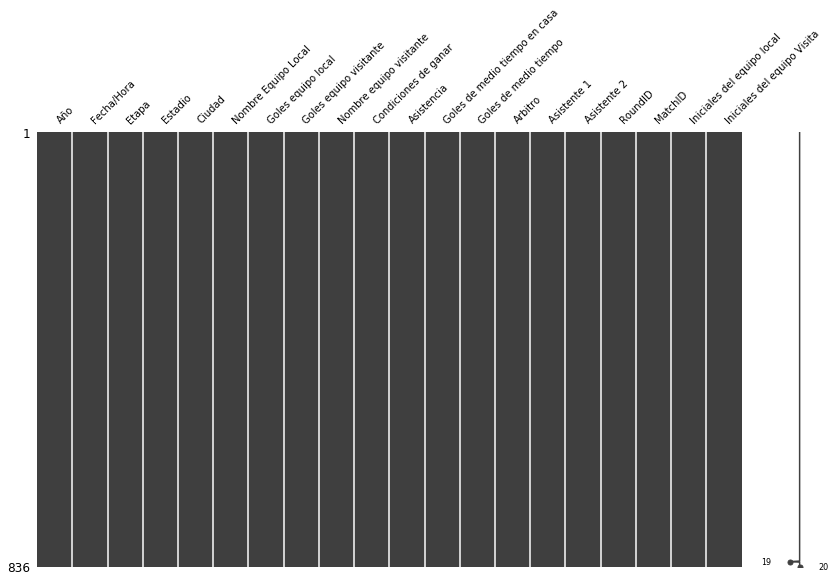

In [0]:
def nulos_out(df):
   """Formula para calcular datos nulos y outliers, 
   y mostrarlo en una tabla de cualquier dataframe con una desviación 
   estandar de 3+- """
   a = df.isnull().sum().to_frame(name='Nulos')#sumamos los nulos
   a['% Nulos'] = ((a['Nulos']/len(df))*100).round()#porcentaje
   #Buscar outliers
   media=np.mean(df.iloc[:,:])
   des_std=np.std(df.iloc[:,:])
   g=des_std*3

   ss=np.where((df.iloc[:,:]<media-(g)) | (df.iloc[:,:]>media+(g)),True,False)
   
   df3=pd.DataFrame(ss)
   df5=df3.sum(axis = 0, skipna = True)
   list_out=list(df5)
   a["Outliers"]=list_out
   a['% Outliers'] = ((a['Outliers']/len(df))*100).round()
   a['Datos'] = df.count()
   a['Registros']= a['Datos']+a['Nulos']
   a=a[['Registros','Datos','Nulos','% Nulos','Outliers','% Outliers']]
   b=msno.matrix(df,figsize = (14,8), fontsize = 10);
   
   return a
nulos_out(partidos2)#Analizamos el dataframe de Jugadores para ver las columnas que tienen nulos y nos sale posición y evento

In [0]:
jugadores=jugadores.drop_duplicates(subset =["MatchID",'Nombre del jugador'],keep='last')#Datos duplicados

In [0]:
jugadores['Evento'].unique()#Analizamos los datos de la columna eventos

array([nan, "G40'", "G70'", ..., "I66' Y73'", "I91' G105'", "I105' G107'"],
      dtype=object)

In [0]:
jugadores['Posicion'].unique()#Lo mismo con posición

array(['GK', nan, 'C', 'GKC'], dtype=object)

In [0]:
"""Definimos que en el dataframe de jugadores tiene muchos datos nulos en la columna eventos y posicion ya que son columnas con datos muy especificos
EVENTO: tiene datos especificos refiriendose a los goles anotados tarjetas obtenidas por jugadores en los partidos que disputaron en la copa, por ende la mayoría de jugadores no tiene evento
por partidos
POSICIÓN: Muy parecido a eventos esta columna tiene datos más especificos en los cuales GK= Es arquero, GKC= Arquero capitan, C=Capitan """

'Definimos que en el dataframe de jugadores tiene muchos datos nulos en la columna eventos y posicion ya que son columnas con datos muy especificos\nEVENTO: tiene datos especificos refiriendose a los goles anotados tarjetas obtenidas por jugadores en los partidos que disputaron en la copa, por ende la mayoría de jugadores no tiene evento\npor partidos\nPOSICIÓN: Muy parecido a eventos esta columna tiene datos más especificos en los cuales GK= Es arquero, GKC= Arquero capitan, C=Capitan '

#2)Identifique y establezca un protocolo para tratar outliers.

In [0]:
"""TRABAJAREMOS LOS DATOS OUTLIERS Y NOS DAREMOS CUENTA QUE HAY CIERTOS DATOS QUE SALEN DE LA MEDIA PERO COMO SON DATOS 
   REALES EN TODOS LOS MANTENDREMOS Y COMO EJEMPLO TOMAREMOS LA ASISTENCIA DEL DATAFRAME DE PARTIDOS Y VEREMOS ESTA CARACTERISTICA"""

'TRABAJAREMOS LOS DATOS OUTLIERS Y NOS DAREMOS CUENTA QUE HAY CIERTOS DATOS QUE SALEN DE LA MEDIA PERO COMO SON DATOS \n   REALES EN TODOS LOS MANTENDREMOS Y COMO EJEMPLO TOMAREMOS LA ASISTENCIA DEL DATAFRAME DE PARTIDOS Y VEREMOS ESTA CARACTERISTICA'

In [0]:
def nulos_out(df,i=None):
   """Formula para calcular datos nulos y outliers, 
   y mostrarlo en una tabla de cualquier dataframe con una desviación 
   estandar de 3+- """
   a = df.isnull().sum().to_frame(name='Nulos')#sumamos los nulos
   a['% Nulos'] = ((a['Nulos']/len(df))*100).round()#porcentaje
   #Buscar outliers
   media=np.mean(df.iloc[:,:])#media general dataframe
   des_std=np.std(df.iloc[:,:])#desviacion estandar
   g=des_std*3
   ss=np.where((df.iloc[:,:]<media-(g)) | (df.iloc[:,:]>media+(g)),True,False)#identificamos los datos outliers
   df3=pd.DataFrame(ss)#lo dejamos como un dataframe
   df5=df3.sum(axis = 0, skipna = True)
   list_out=list(df5)
   a["Outliers"]=list_out#creamos una columna llamado outliers que nos mostrara la cantidad
   a['% Outliers'] = ((a['Outliers']/len(df))*100).round()#creamos la columna con % de outliers
   #b=msno.matrix(df,figsize = (14,8), fontsize = 10);# grafico misigno
   try:#intentamos con try si analizamos un dataframe junto con una columna
     c=df[(df[i]>g[i]+media[i])|(df[i]<media[i]-g[i])]#valores ouliers con media y desviacion de la misma columna
     d=df[i].mean()#media de la columna a trabajar
   except:
     c=None
     d=None
   return a,c,d
a,c,d=nulos_out(partidos2,'Asistencia')
c.drop(['Condiciones de ganar'],axis=1)

,Año,Fecha/Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Goles equipo local,Goles equipo visitante,Nombre equipo visitante,Asistencia,Goles de medio tiempo en casa,Goles de medio tiempo,Arbitro,Asistente 1,Asistente 2,RoundID,MatchID,Iniciales del equipo local,Iniciales del equipo Visita
63,1950.0,01 Jul 1950 - 15:00,Group 1,Maracana,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG
70,1950.0,09 Jul 1950 - 15:00,Group 6,Maracana,Rio De Janeiro,Brazil,7.0,1.0,Sweden,138886.0,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE
71,1950.0,13 Jul 1950 - 15:00,Group 6,Maracana,Rio De Janeiro,Brazil,6.0,1.0,Spain,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
74,1950.0,16 Jul 1950 - 15:00,Group 6,Maracana,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA


In [0]:
partidos2.iloc[74].to_frame().T

,Año,Fecha/Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Goles equipo local,Goles equipo visitante,Nombre equipo visitante,Condiciones de ganar,Asistencia,Goles de medio tiempo en casa,Goles de medio tiempo,Arbitro,Asistente 1,Asistente 2,RoundID,MatchID,Iniciales del equipo local,Iniciales del equipo Visita
74,1950,16 Jul 1950 - 15:00,Group 6,Maracana,Rio De Janeiro,Uruguay,2,1,Brazil,,173850,0,0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209,1190,URU,BRA


In [0]:
print("la asistencia promedio de todas las copas es :",(partidos2['Asistencia'].sum()/835).round())

la asistencia promedio de todas las copas es : 44859.0


In [0]:
partidos2['Asistencia'].max()# Asistencia maxima de todos los partidos de los mundiales

173850.0

In [0]:
violin=partidos2[(partidos2['Año']==1950)&(partidos['Asistencia']!='NaN')]
violin['Asistencia'].mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


47511.181818181816

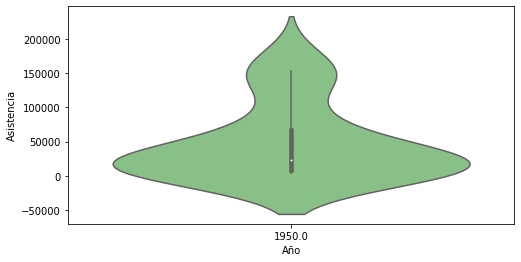

In [0]:
"""GRAFICO VIOLETPLOT PARA VER OUTLIERS DE LA COLUMNA ASISTENCIA DEL AÑO 1950"""
plt.figure(figsize=(8,4))
sns.violinplot(x='Año',y='Asistencia',data=violin,palette='Accent');

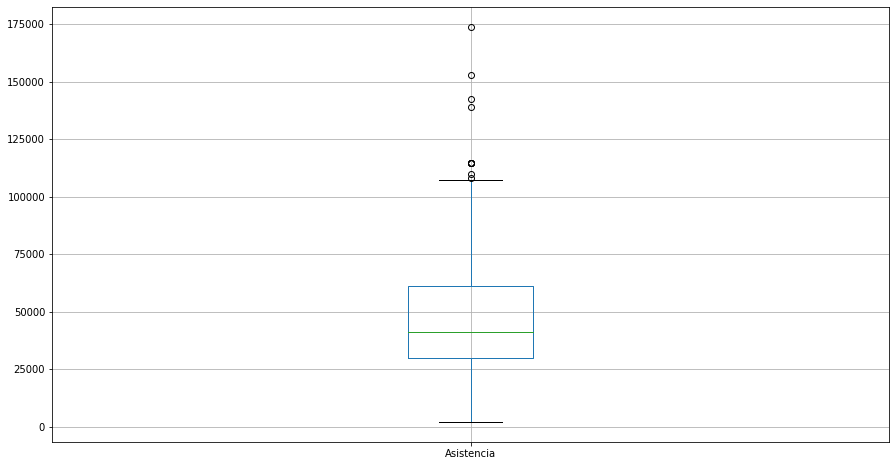

In [0]:
#  df.boxplot(column=['Col1', 'Col2', 'Col3'])
plt.figure(figsize=(15,8))
partidos2.boxplot(column=['Asistencia'])

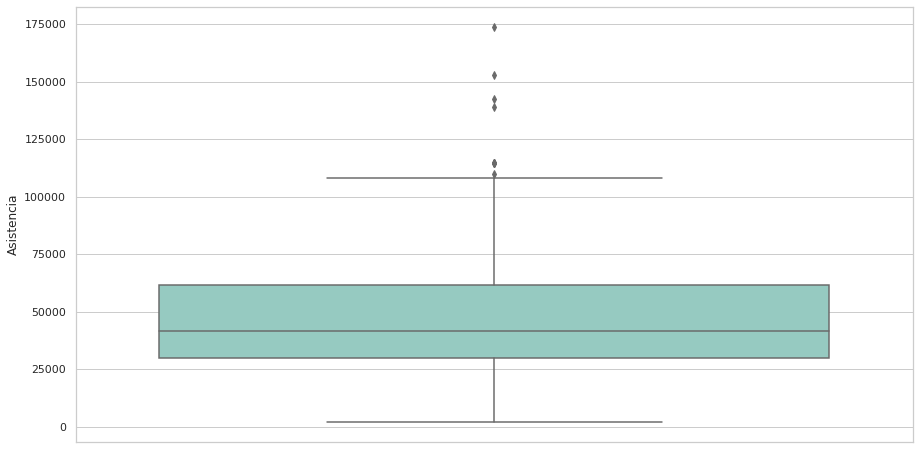

In [0]:
# >>> import seaborn as sns
# >>> sns.set(style="whitegrid")
# >>> tips = sns.load_dataset("tips")
# >>> ax = sns.boxplot(x=tips["total_bill"])
#  ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
# ...                  data=tips, palette="Set3")
plt.figure(figsize=(15,8))
sns.boxplot(x=partidos['Asistencia'],palette="Set3",orient="v")

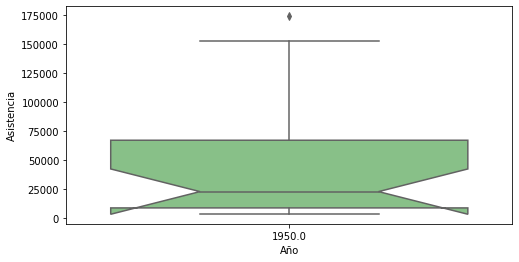

In [0]:
"""GRAFICO BOXPLOT PARA VER OUTLIERS DE LA COLUMNA ASISTENCIA DEL AÑO 1950"""
plt.figure(figsize=(8,4))
sns.boxplot(x='Año',y='Asistencia',notch=True,data=violin,palette='Accent');

Para la asistencia de publico sacamos una media de 44.859 espectadores por partido, pero en el partido de 1950 entre Uruguay y Brazil hubo una asistencia de 173850 saliendo por más de 4 veces de la media

Como conclución los datos outliers no son datos erroneos más que datos que pueden estar muy por sobre la media pero se deben mantener

#3)Obtenga visualizaciones pertinentes a su análisis sobre los mundiales.

In [0]:
ganadores=copas['Ganador'].value_counts().to_frame()#Cantidad de copas mundiales ganadas
ganadores

,Ganador
Brazil,5
Italy,4
Germany,4
Argentina,2
Uruguay,2
England,1
France,1
Spain,1


In [0]:
segundo=copas['Subcampeones'].value_counts().to_frame()#Cantidad de segundos lugares en copas del mundo
segundo

,Subcampeones
Germany,4
Argentina,3
Netherlands,3
Brazil,2
Hungary,2
Czechoslovakia,2
Italy,2
France,1
Sweden,1


In [0]:
tercero=copas['Tercero'].value_counts().to_frame()#Cantidad de terceros lugares en copas del mundo
tercero

,Tercero
Germany,4
Brazil,2
France,2
Poland,2
Sweden,2
Netherlands,1
Croatia,1
USA,1
Turkey,1
Chile,1


In [0]:
ganadores.loc['Brazil'][0]

5

In [0]:
def estadistica(p,s,t):
  l1=set(p.index)#Colocamos los indices que son los paises en un conjunto
  l2=set(s.index)#lo mismos
  l3=set(t.index)#lo mismo
  l=list(l1.union(l2,l3))#unimos los conjuntos
  vector=dict()#creamos un diccionario vacío
  for i in l:
    try:#intento hacer esto
      v1=p.loc[i][0]#busca el pais de la lista y copia el valor que posee el primer dataframe
      
    except:#si falla el intento hace esto
      v1=0# Si este no tiene valor le asignara un 0
      """Lo mismo para los siquientes v"""
    try:
      v2=s.loc[i][0]
    except:
      v2=0
    try:
      v3=t.loc[i][0]
    except:
      v3=0
    vector[i]=[v1,v2,v3]#de nuestro diccionario vacío ingresando país por país copiara los valores de los 3v
  return pd.DataFrame(vector,index=['Campeon','Segundo','Tercero']).T.sort_values(by=['Campeon','Segundo','Tercero'],ascending=False)#creamos los indices campeon, segundo y tercero y lo volteamos con T y ordenamos
estadisticas=estadistica(ganadores,segundo,tercero)
estadisticas


,Campeon,Segundo,Tercero
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Argentina,2,3,0
Uruguay,2,0,0
France,1,1,2
Spain,1,0,0
England,1,0,0
Netherlands,0,3,1
Hungary,0,2,0


In [0]:
estadisticas['Total']=estadisticas['Campeon']+estadisticas['Segundo']+estadisticas['Tercero']
estadisticas.reset_index(drop=False)
estadisticas

,Campeon,Segundo,Tercero,Total
Brazil,5,2,2,9
Germany,4,4,4,12
Italy,4,2,1,7
Argentina,2,3,0,5
Uruguay,2,0,0,2
France,1,1,2,4
Spain,1,0,0,1
England,1,0,0,1
Netherlands,0,3,1,4
Hungary,0,2,0,2


In [0]:
copas

,Año,Organizador,Ganador,Subcampeones,Tercero,Cuarto,Goles anotados,Equipos calificados,Partidos jugados,Asistencia
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753


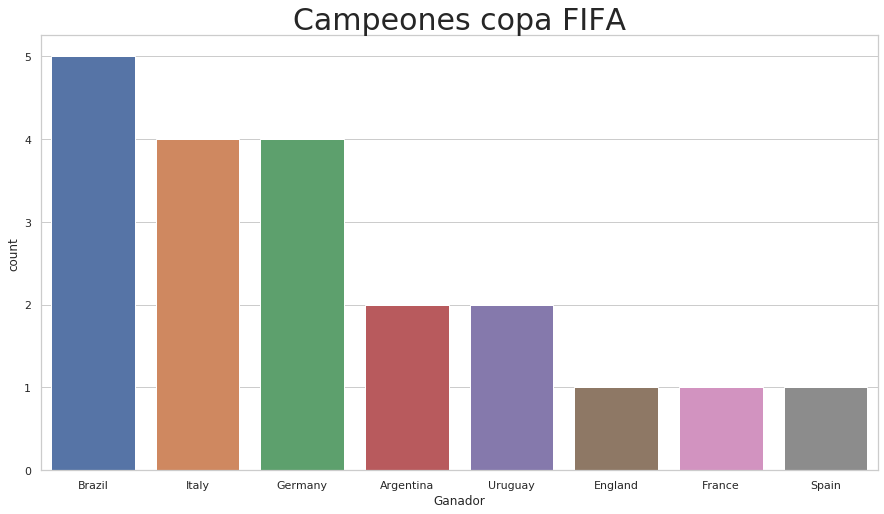

In [0]:
plt.figure(figsize=(15,8))
sns.countplot(x='Ganador',data=copas,dodge=False,saturation=0.8,orient="vertical",order=copas['Ganador'].value_counts().index);
plt.title('Campeones copa FIFA',fontsize=30);

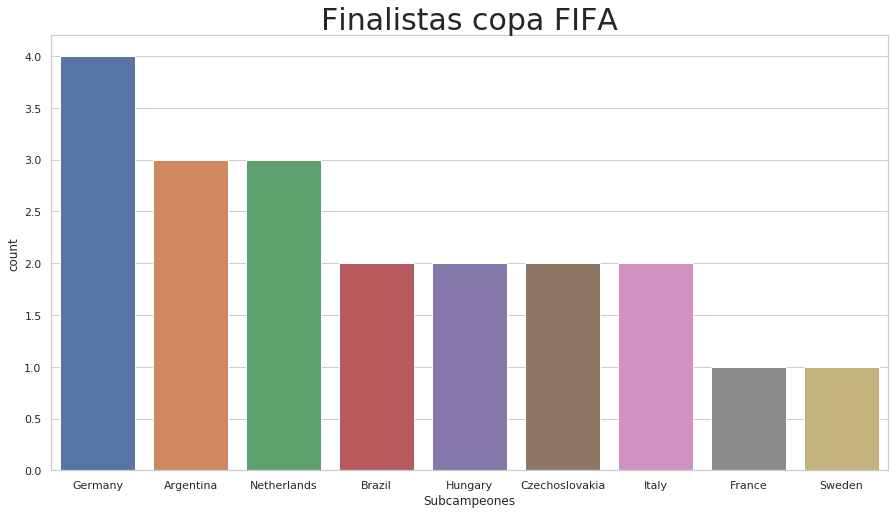

In [0]:
plt.figure(figsize=(15,8))
sns.countplot(x='Subcampeones',data=copas,dodge=False,saturation=0.8,order=copas['Subcampeones'].value_counts().index);
plt.title('Finalistas copa FIFA',fontsize=30);

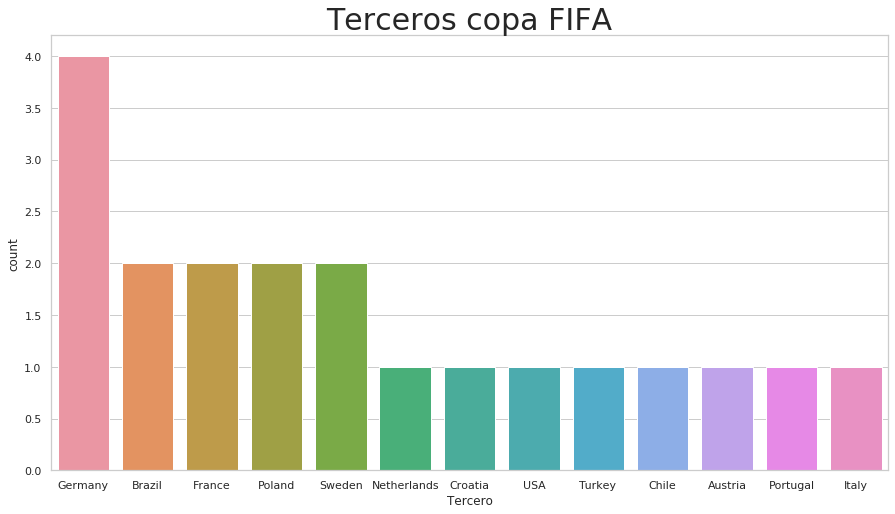

In [0]:
plt.figure(figsize=(15,8))
sns.countplot(x='Tercero',data=copas,order=copas['Tercero'].value_counts().index);
plt.title('Terceros copa FIFA',fontsize=30);

In [0]:
sns.countplot

Como conclución en nuestra visualización determinamos que Brazil es el equipo con más copas del mundo pero Alemania es el equipo que ha estado en más instancias finales

#4)Hacer un análisis de la concurrencia de público para los años donde se disputó el mundial FIFA,
 repita lo anterior según los distintos horarios en los que se disputan los encuentros. Indique los partidos con mayor concurrencia de público.


##Analisis por copa

In [0]:
copas4=pd.concat([copas['Año'],copas['Organizador'],copas['Asistencia'],copas['Partidos jugados']],axis=1)
#copas = copas.replace({'Cuarto':{'Germany FR':'Germany'}})
copas4=copas.replace({'590.549':590549,'363.000':363000,'375.700':375700,'1.045.246':1045246,'768.607':768607,'819.810':819810,
                      '893.172':893172,'1.563.135':1563135,'1.603.975':1603975,'1.865.753':1865753,'1.545.791':1545791,'2.109.723':2109723,
                      '2.394.031':2394031,'2.516.215':2516215,'3.587.538':3587538,'2.785.100':2785100,'2.705.197':2705197,
                      '3.359.439':3359439,'3.178.856':3178856,'3.386.810':3386810})


In [0]:
copas4['Asistencia'].sum()
#copas_mundiales.Attendance.str.replace('.', '').astype(int)

37457647

In [0]:
copas44=pd.concat([copas['Año'],copas['Organizador'],copas['Asistencia'],copas['Partidos jugados'],copas['Goles anotados']],axis=1)
copas44['Asistencia']=copas44.Asistencia.str.replace('.','').astype(int)
totalpublico=copas44['Asistencia'].sum()

In [0]:
copas44

,Año,Organizador,Asistencia,Partidos jugados,Goles anotados
0,1930,Uruguay,590549,18,70
1,1934,Italy,363000,17,70
2,1938,France,375700,18,84
3,1950,Brazil,1045246,22,88
4,1954,Switzerland,768607,26,140
5,1958,Sweden,819810,35,126
6,1962,Chile,893172,32,89
7,1966,England,1563135,32,89
8,1970,Mexico,1603975,32,95
9,1974,Germany,1865753,38,97


In [0]:
copas44['Porcentaje de publico']=(copas44['Asistencia']*100/totalpublico).round()
copas44['Promedio publico']=((copas44['Asistencia']*1)/copas44['Partidos jugados']).round()
copas44['Promedio goles']=((copas44['Goles anotados']*1)/copas44['Partidos jugados']).round()
copas44

,Año,Organizador,Asistencia,Partidos jugados,Goles anotados,Porcentaje de publico,Promedio publico,Promedio goles
0,1930,Uruguay,590549,18,70,2.0,32808.0,4.0
1,1934,Italy,363000,17,70,1.0,21353.0,4.0
2,1938,France,375700,18,84,1.0,20872.0,5.0
3,1950,Brazil,1045246,22,88,3.0,47511.0,4.0
4,1954,Switzerland,768607,26,140,2.0,29562.0,5.0
5,1958,Sweden,819810,35,126,2.0,23423.0,4.0
6,1962,Chile,893172,32,89,2.0,27912.0,3.0
7,1966,England,1563135,32,89,4.0,48848.0,3.0
8,1970,Mexico,1603975,32,95,4.0,50124.0,3.0
9,1974,Germany,1865753,38,97,5.0,49099.0,3.0


Analizamos los datos de copas y visualizamos la asistencia por mundial los partidos los goles el porcentaje de publico por cada mundial tomando en consideracion el total de publico de todos los mundiales, promedio de publico por partido en cada mundial, promedio de gol por partido de cada mundial


##Analisis por horario de partido

In [0]:
partidos4=partidos2.copy()
partidos4

,Año,Fecha/Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Goles equipo local,Goles equipo visitante,Nombre equipo visitante,Condiciones de ganar,Asistencia,Goles de medio tiempo en casa,Goles de medio tiempo,Arbitro,Asistente 1,Asistente 2,RoundID,MatchID,Iniciales del equipo local,Iniciales del equipo Visita
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [0]:
partidos4['datetime2']=pd.to_datetime(partidos4['Fecha/Hora'])
partidos4.head()
partidos4['Hora']=[d.time() for d in partidos4['datetime2']]
partidos4['Fecha']=[d.date() for d in partidos4['datetime2']]
partidos4=partidos4.drop(['datetime2','Fecha/Hora'],axis=1)
partidos4

,Año,Etapa,Estadio,Ciudad,Nombre Equipo Local,Goles equipo local,Goles equipo visitante,Nombre equipo visitante,Condiciones de ganar,Asistencia,Goles de medio tiempo en casa,Goles de medio tiempo,Arbitro,Asistente 1,Asistente 2,RoundID,MatchID,Iniciales del equipo local,Iniciales del equipo Visita,Hora,Fecha
0,1930.0,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,15:00:00,1930-07-13
1,1930.0,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,15:00:00,1930-07-13
2,1930.0,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,12:45:00,1930-07-14
3,1930.0,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,14:50:00,1930-07-14
4,1930.0,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,16:00:00,1930-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC,17:00:00,2014-07-05
848,2014.0,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER,17:00:00,2014-07-08
849,2014.0,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG,17:00:00,2014-07-09
850,2014.0,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED,17:00:00,2014-07-12


In [0]:
partidos44=pd.concat([partidos4['Año'],partidos4['Fecha'],partidos4['Hora'],partidos4['Etapa'],partidos4['Estadio'],partidos4['Ciudad'],partidos4['Nombre Equipo Local'],
                    partidos4['Nombre equipo visitante'],partidos4['Asistencia']],axis=1)

In [0]:
partidos44#data frame con los datos a trabajar 

,Año,Fecha,Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Nombre equipo visitante,Asistencia
0,1930.0,1930-07-13,15:00:00,Group 1,Pocitos,Montevideo,France,Mexico,4444.0
1,1930.0,1930-07-13,15:00:00,Group 4,Parque Central,Montevideo,USA,Belgium,18346.0
2,1930.0,1930-07-14,12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,Brazil,24059.0
3,1930.0,1930-07-14,14:50:00,Group 3,Pocitos,Montevideo,Romania,Peru,2549.0
4,1930.0,1930-07-15,16:00:00,Group 1,Parque Central,Montevideo,Argentina,France,23409.0
...,...,...,...,...,...,...,...,...,...
847,2014.0,2014-07-05,17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,Costa Rica,51179.0
848,2014.0,2014-07-08,17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,Germany,58141.0
849,2014.0,2014-07-09,17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,Argentina,63267.0
850,2014.0,2014-07-12,17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,Netherlands,68034.0


In [0]:

pd.options.display.float_format = '{:.0f}'.format#cambiamos los numeros a enteros sin el 0 y eliminamos los puntos
partidos44

,Año,Fecha,Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Nombre equipo visitante,Asistencia
0,1930,1930-07-13,15:00:00,Group 1,Pocitos,Montevideo,France,Mexico,4444
1,1930,1930-07-13,15:00:00,Group 4,Parque Central,Montevideo,USA,Belgium,18346
2,1930,1930-07-14,12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,Brazil,24059
3,1930,1930-07-14,14:50:00,Group 3,Pocitos,Montevideo,Romania,Peru,2549
4,1930,1930-07-15,16:00:00,Group 1,Parque Central,Montevideo,Argentina,France,23409
...,...,...,...,...,...,...,...,...,...
847,2014,2014-07-05,17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,Costa Rica,51179
848,2014,2014-07-08,17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,Germany,58141
849,2014,2014-07-09,17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,Argentina,63267
850,2014,2014-07-12,17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,Netherlands,68034


In [0]:
print(partidos44.groupby(['Año','Hora'])['Asistencia'].sum().to_frame().to_string())#asistencia por hora

               Asistencia
Año  Hora                
1930 12:45:00       42365
     12:50:00        2000
     13:00:00       25466
     14:15:00       68346
     14:30:00       57735
     14:45:00      221767
     14:50:00       72571
     15:00:00       76890
     16:00:00       23409
1934 16:30:00      301000
     17:30:00       55000
     18:00:00        7000
1938 17:00:00      252082
     17:30:00       13452
     18:00:00       99166
     18:30:00       11000
1950 15:00:00     1033763
     15:30:00        7903
     15:40:00        3580
1954 16:50:00       90000
     17:00:00      293137
     17:10:00       62500
     17:50:00       43000
     18:00:00      265970
     18:10:00       14000
1958 14:00:00       64394
     15:00:00       49737
     17:00:00       32483
     19:00:00      673196
1962 14:30:00      327878
     15:00:00      565294
1966 15:00:00      394425
     16:30:00       61112
     19:30:00     1107598
1970 12:00:00      537333
     16:00:00     1066642
1974 16:00:0

## Analisis de los partidos con mayor asistencia

In [0]:
partidos44.sort_values(['Asistencia'],ascending=False).head(20)

,Año,Fecha,Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Nombre equipo visitante,Asistencia
74,1950,1950-07-16,15:00:00,Group 6,Maracana,Rio De Janeiro,Uruguay,Brazil,173850
71,1950,1950-07-13,15:00:00,Group 6,Maracana,Rio De Janeiro,Brazil,Spain,152772
63,1950,1950-07-01,15:00:00,Group 1,Maracana,Rio De Janeiro,Brazil,Yugoslavia,142429
70,1950,1950-07-09,15:00:00,Group 6,Maracana,Rio De Janeiro,Brazil,Sweden,138886
379,1986,1986-06-07,12:00:00,Group B,Estadio Azteca,Mexico City,Mexico,Paraguay,114600
411,1986,1986-06-29,12:00:00,Final,Estadio Azteca,Mexico City,Argentina,Germany,114600
407,1986,1986-06-22,12:00:00,Quarter-finals,Estadio Azteca,Mexico City,Argentina,England,114580
397,1986,1986-06-15,12:00:00,Round of 16,Estadio Azteca,Mexico City,Mexico,Bulgaria,114580
409,1986,1986-06-25,16:00:00,Semi-finals,Estadio Azteca,Mexico City,Argentina,Belgium,114500
367,1986,1986-06-03,12:00:00,Group B,Estadio Azteca,Mexico City,Belgium,Mexico,110000


partido de brasil vs uruguay de 1950 tiene record de asistencia de la histori

#5)Visualice la cantidad de goles anotados por cada uno de los eventos mundialistas. 
Luego, muestre la distribución de los goles de local y visita. Comente sus resultados.


In [0]:
pd.options.display.float_format = '{:.0f}'.format#cambiamos los numeros a enteros sin el 0 y eliminamos los puntos
partidos2

,Año,Fecha/Hora,Etapa,Estadio,Ciudad,Nombre Equipo Local,Goles equipo local,Goles equipo visitante,Nombre equipo visitante,Condiciones de ganar,Asistencia,Goles de medio tiempo en casa,Goles de medio tiempo,Arbitro,Asistente 1,Asistente 2,RoundID,MatchID,Iniciales del equipo local,Iniciales del equipo Visita
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED


In [0]:
copas5=pd.concat([copas['Año'],copas['Organizador'],copas['Goles anotados']],axis=1)



In [0]:
partidos55a=partidos2.groupby(['Año'])['Goles equipo local'].sum().to_frame()
partidos55a['Goles equipo visita']=partidos2.groupby(['Año'])['Goles equipo visitante'].sum()

partidos55a['Total']=partidos55a['Goles equipo local']+partidos55a['Goles equipo visita']

pd.options.display.float_format = '{:.0f}'.format
partidos55a

,Goles equipo local,Goles equipo visita,Total
Año,,,
1930,59,11,70
1934,48,22,70
1938,61,23,84
1950,69,19,88
1954,109,31,140
1958,88,38,126
1962,69,20,89
1966,69,20,89
1970,72,23,95


Text(0.5, 1.0, 'Goles mundiales')

findfont: Font family ['Allegra'] not found. Falling back to DejaVu Sans.


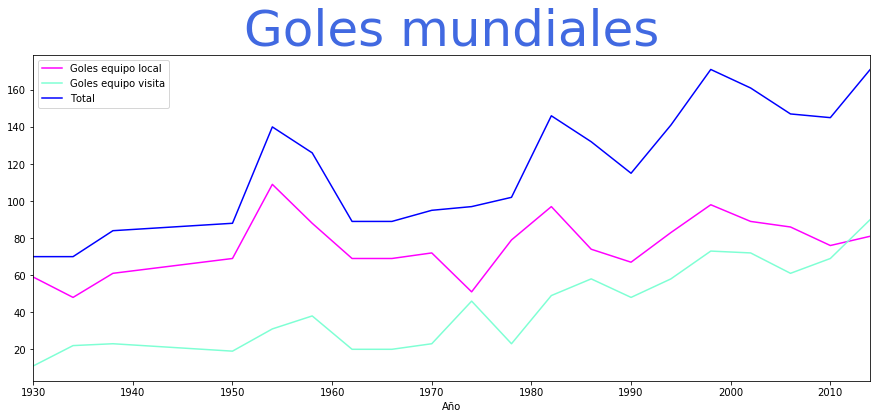

In [0]:
partidos55a.plot(figsize=(15,6),color=['magenta','aquamarine','b']);
plt.title('Goles mundiales',fontsize=50,loc='center',fontname='Allegra',color='royalblue')

podemos observar que la mayoria de goles lo hace el equipo que juega como local o primera llave

#6)Visualizar los resultados de los partidos por países (ganados, empatados, perdidos).

In [0]:
partidos66=pd.concat([partidos2['Año'],partidos2['Etapa'],partidos2['Nombre Equipo Local'],partidos2['Goles equipo local'],
                      partidos2['Nombre equipo visitante'],partidos2['Goles equipo visitante']],axis=1)
partidos66

,Año,Etapa,Nombre Equipo Local,Goles equipo local,Nombre equipo visitante,Goles equipo visitante
0,1930,Group 1,France,4,Mexico,1
1,1930,Group 4,USA,3,Belgium,0
2,1930,Group 2,Yugoslavia,2,Brazil,1
3,1930,Group 3,Romania,3,Peru,1
4,1930,Group 1,Argentina,1,France,0
...,...,...,...,...,...,...
847,2014,Quarter-finals,Netherlands,0,Costa Rica,0
848,2014,Semi-finals,Brazil,1,Germany,7
849,2014,Semi-finals,Netherlands,0,Argentina,0
850,2014,Play-off for third place,Brazil,0,Netherlands,3


In [0]:
# partidos66['Victoria']=np.where(partidos66['Goles equipo local'] == partidos66['Goles equipo visitante'], 'E',
#                                 np.where(partidos66['Goles equipo local'] > partidos66['Goles equipo visitante'], 'L','V'))#ocupar np.where para dejar una columna con 3 valores distintos (V,L,E)


In [0]:
partidos66['E'] = np.where(partidos66['Goles equipo local'] == partidos66['Goles equipo visitante'], 1,0)
partidos66['E2'] = np.where(partidos66['Goles equipo visitante']==partidos66['Goles equipo local'] , 1,0)
partidos66['Victoria_l'] = np.where(partidos66['Goles equipo local'] > partidos66['Goles equipo visitante'], 1,0)
partidos66['Victoria_v'] = np.where(partidos66['Goles equipo local'] < partidos66['Goles equipo visitante'], 1,0)
partidos66['Derrota_l'] = np.where(partidos66['Goles equipo local'] < partidos66['Goles equipo visitante'], 1,0)
partidos66['Derrota_v'] = np.where(partidos66['Goles equipo local'] > partidos66['Goles equipo visitante'], 1,0)

victoria_l=partidos66.groupby(['Nombre Equipo Local'])['Victoria_l'].sum().sort_values(ascending=False).to_frame()
victoria_v=partidos66.groupby(['Nombre equipo visitante'])['Victoria_v'].sum().sort_values(ascending=False).to_frame()
empates=partidos66.groupby(['Nombre equipo visitante'])['E'].sum().sort_values(ascending=False).to_frame()
derrotas_l=partidos66.groupby(['Nombre Equipo Local'])['Derrota_l'].sum().sort_values(ascending=False).to_frame()
derrotas_v=partidos66.groupby(['Nombre equipo visitante'])['Derrota_v'].sum().sort_values(ascending=False).to_frame()
empates2=partidos66.groupby(['Nombre Equipo Local'])['E2'].sum().sort_values(ascending=False).to_frame()

In [0]:
def estadistica(p,s,t,u,w,x):
  l1=set(p.index)#Colocamos los indices que son los paises en un conjunto
  l2=set(s.index)#lo mismos
  l3=set(t.index)#lo mismo
  l4=set(u.index)
  l5=set(w.index)
  l6=set(x.index)
  l=list(l1.union(l2,l3,l4,l5,l6))#unimos los conjuntos
  vector=dict()#creamos un diccionario vacío
  for i in l:
    try:#intento hacer esto
      v1=p.loc[i][0]#busca el pais de la lista y copia el valor que posee el primer dataframe
      
    except:#si falla el intento hace esto
      v1=0# Si este no tiene valor le asignara un 0
      """Lo mismo para los siquientes v"""
    try:
      v2=s.loc[i][0]
    except:
      v2=0
    try:
      v3=t.loc[i][0]
    except:
      v3=0
    try:
      v4=u.loc[i][0]
    except:
      v4=0
    try:
      v5=w.loc[i][0]     
    except:
      v5=0  
    try:
      v6=x.loc[i][0]  
    except:
      v6=0  
    vector[i]=[v1,v2,v3,v4,v5,v6]#de nuestro diccionario vacío ingresando país por país copiara los valores de los 6v
  return pd.DataFrame(vector,index=['Ganados_local','Ganados de visita','E','Derrota_l','Derrota_v','E2']).T.sort_values(by=['Ganados_local','Ganados de visita','E','Derrota_l','Derrota_v','E2'],ascending=False)#creamos los indices campeon, segundo y tercero y lo volteamos con T y ordenamos
ganados1=estadistica(victoria_l,victoria_v,empates,derrotas_l,derrotas_v,empates2)#ingresamos nuestros 6 pequeños dataframe
ganados1

  

,Ganados_local,Ganados de visita,E,Derrota_l,Derrota_v,E2
Brazil,58,12,4,7,10,13
Germany,51,15,2,6,14,18
Argentina,39,3,9,8,13,5
Italy,38,7,7,5,12,14
England,22,4,9,2,14,11
...,...,...,...,...,...,...
China PR,0,0,0,1,2,0
Haiti,0,0,0,1,2,0
El Salvador,0,0,0,0,6,0
"rn"">Trinidad and Tobago",0,0,0,0,2,1


In [0]:
ganados1['PG']=ganados1['Ganados_local']+ganados1['Ganados de visita']#Sumamos las columnas de victoria y dejamos solo una que es PG=Partidos Ganados
ganados1['PP']=ganados1['Derrota_l']+ganados1['Derrota_v']#Sumamos las derrotas y dejamos la columna PP=Partidos perdidos
ganados1['E']=ganados1['E']+ganados1['E2']#Sumamos los empates y dejamos la columna E=Empates
ganados2=ganados1.drop(['Ganados_local','Ganados de visita','Derrota_l','Derrota_v','E2'],axis=1)

In [0]:
ganados2['Puntos']=(ganados2['PG']*3)+ganados2['E']#Creamos una nueva columna para ordenar los paises por puntos estableciendo que por cada partido ganado 3 puntos y 1 como empate 0 derrota
ganados2['PJ']=ganados2['PG']+ganados2['E']+ganados2['PP']
ganados2=ganados2[['PJ','PG','E','PP','Puntos']]
#df.sort_values('2')
print(ganados2.sort_values('Puntos',ascending=False).to_string())

                             PJ  PG   E  PP  Puntos
Brazil                      104  70  17  17     227
Germany                     106  66  20  20     218
Italy                        83  45  21  17     156
Argentina                    77  42  14  21     140
Spain                        59  29  12  18      99
England                      62  26  20  16      98
France                       59  28  12  19      96
Netherlands                  50  27  12  11      93
Uruguay                      51  20  12  19      72
Sweden                       46  16  13  17      61
Mexico                       53  14  14  25      56
Yugoslavia                   37  16   8  13      56
Belgium                      41  14   9  18      51
Soviet Union                 31  15   6  10      51
Poland                       31  15   5  11      50
Hungary                      32  15   3  14      48
Portugal                     26  13   4   9      43
Austria                      29  12   4  13      40
Chile       

In [0]:
ganados2=ganados2.sort_values('Puntos',ascending=False)

# ganados2=ganados2.index.names = ['Pais']
#ganados2=ganados2.reset_index(drop=False)
ganados2.sort_values('Puntos',ascending=False).head(20)

,PJ,PG,E,PP,Puntos
Brazil,104,70,17,17,227
Germany,106,66,20,20,218
Italy,83,45,21,17,156
Argentina,77,42,14,21,140
Spain,59,29,12,18,99
England,62,26,20,16,98
France,59,28,12,19,96
Netherlands,50,27,12,11,93
Uruguay,51,20,12,19,72
Sweden,46,16,13,17,61


#7) Realice tanto cross - table como pivot-table  para mejorar su análisis en base a elementos como por ejemplo, año y ciudad del evento mundialista

## Estadios donde mas gente ha concurrido en todas las copas mundiales


In [0]:
partidos7=pd.pivot_table(partidos2,index=['Ciudad'],values='Asistencia',
               aggfunc='sum').round().sort_values('Asistencia',ascending=False)
partidos7.head(30)              

,Asistencia
Ciudad,
Mexico City,2157550
Rio De Janeiro,1332730
Johannesburg,1043702
London,823696
Guadalajara,800456
Buenos Aires,749786
Los Angeles,740807
Saint-Denis,704000
Santiago De Chile,663771


In [0]:
partidos77=pd.crosstab(index=[partidos2['Ciudad']],columns=partidos2['Año'],
                   values=partidos2['Asistencia'], aggfunc='sum',normalize=False,
                   margins=False).fillna(0)
print(partidos77.to_string())                   


Año                                  1930  1934   1938   1950   1954   1958   1962   1966   1970   1974   1978   1982    1986   1990   1994   1998   2002   2006    2010   2014
Ciudad                                                                                                                                                                         
Alicante                                0     0      0      0      0      0      0      0      0      0      0  92593       0      0      0      0      0      0       0      0
Antibes                                 0     0   7000      0      0      0      0      0      0      0      0      0       0      0      0      0      0      0       0      0
Arica                                   0     0      0      0      0      0  68807      0      0      0      0      0       0      0      0      0      0      0       0      0
Barcelona                               0     0      0      0      0      0      0      0      0      0      0 451000   

Se hace un pivot table y cross table y se visualizan los mismos resultados y podemos ver de mejor manera en pivot el orden de mayor a menos en asistencia, y en cross podemos ver de manera completa mas rapido todos los resultados

#8)Realice un análisis de los jugadores con las mejores estadísticas según los mundiales disputados (participaciones, rendimiento, etc).


In [0]:
# EventG=Goal, OG=Own Goal,
#  Y=Yellow Card, R=Red Card, SY = Red Card by second yellow,
#   P=Penalty, MP=Missed Penalty, 
#   I = Substitution In, O=Substitute Out

In [0]:
jugadores8=jugadores.copy()
jugadores8=jugadores8.drop(['Posicion'],axis=1)
# jugadores8


In [0]:


pd.options.display.float_format = '{:.0f}'.format
jugadores8

,RoundID,MatchID,Iniciales del equipo,Nombre del entrenador,Alineacion,Numero camiseta,Nombre del jugador,Evento
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN
...,...,...,...,...,...,...,...,...
37043,255951,300186497,USA,KLINSMANN Juergen (GER),N,17,ALTIDORE,NaN
37044,255951,300186497,BEL,WILMOTS Marc (BEL),N,16,DEFOUR,NaN
37045,255951,300186497,USA,KLINSMANN Juergen (GER),N,18,WONDOLOWSKI,I72'
37046,255951,300186497,BEL,WILMOTS Marc (BEL),N,21,VANDEN BORRE,NaN


In [0]:
jugadores8['Goles'] = jugadores8.Evento.str.count('G')+jugadores8.Evento.str.count('P')
jugadores8['YC']=jugadores8.Evento.str.count('Y')+jugadores8.Evento.str.count('SY')
jugadores8['RC']=jugadores8.Evento.str.count('R')

In [0]:
jugadores8.groupby(['Nombre del jugador'])['Goles'].sum().sort_values(ascending=False).to_frame().head(15)


,Goles
Nombre del jugador,
KLOSE,16
RONALDO,15
Gerd MUELLER,14
Just FONTAINE,13
PELE,12
M�LLER,11
Sandor KOCSIS,11
Grzegorz LATO,10
Helmut RAHN,10


In [0]:
jugadores8.groupby(['Nombre del jugador'])['YC'].sum().sort_values(ascending=False).to_frame().head(5)

,YC
Nombre del jugador,
PAREDES,7
V. BRONCKHORST,7
W. PALACIOS,6
Ricardo GIUSTI,6
HEITINGA,6


In [0]:
jugadores8.groupby(['Nombre del jugador'])['RC'].sum().sort_values(ascending=False).to_frame().head(5)                                                                

,RC
Nombre del jugador,
SONG,2
Jan RIHA,1
Alfred PHIRI,1
YOON Deok Yeo,1
Peter ARTNER,1


#9) Evalúe dependencia lineal entre las variables de cada BBDD y obtenga una relación para determinar el ganador de cada partido. Relacione el máximo goleador del mundial con el ganador del torneo.

## correlacion dataframe partidos

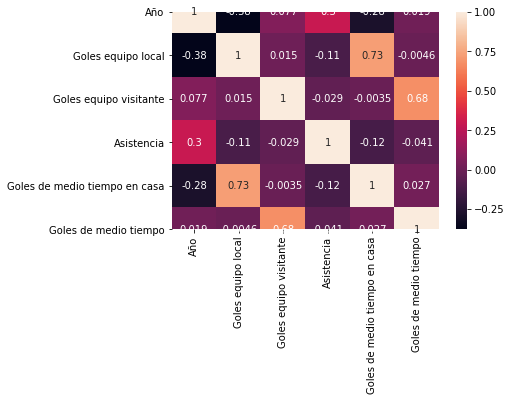

In [0]:
partidos9=partidos2.drop(['MatchID','RoundID'],axis=1)
hh = partidos9.corr()
sns.heatmap(hh,annot=True);

## correlacion copas

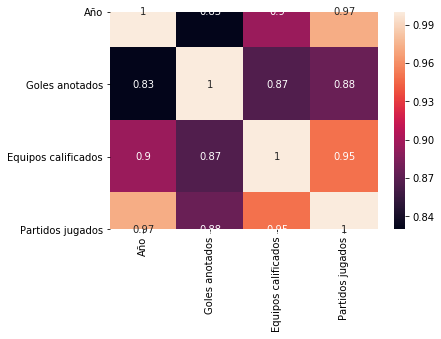

In [0]:
hg= copas.corr()
sns.heatmap(hg,annot=True);

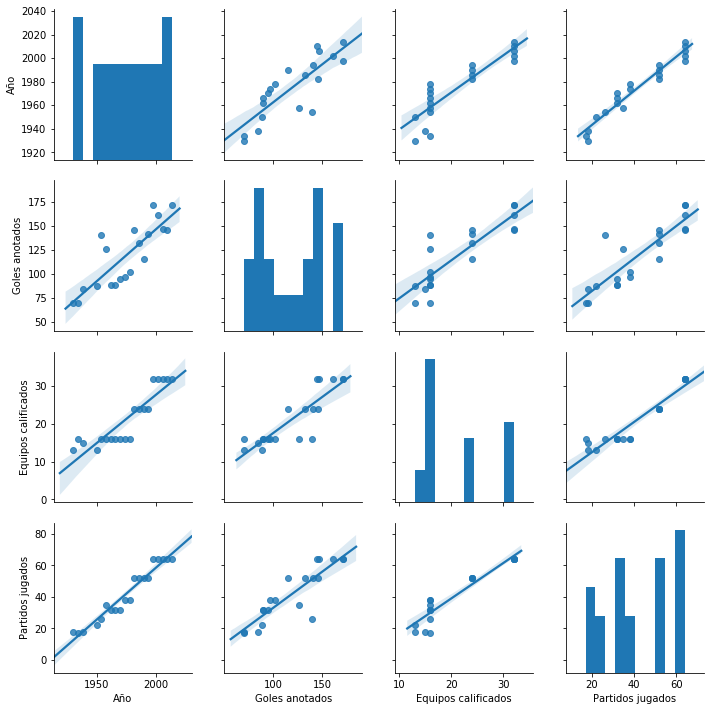

In [0]:
sns.pairplot(copas, kind="reg",palette='aquamarine')
plt.show() 

## relacion para determinar el ganador de los partidos

In [0]:
ganados1

,Ganados_local,Ganados de visita,E,Derrota_l,Derrota_v,E2,PG,PP
Brazil,58,12,17,7,10,13,70,17
Germany,51,15,20,6,14,18,66,20
Argentina,39,3,14,8,13,5,42,21
Italy,38,7,21,5,12,14,45,17
England,22,4,20,2,14,11,26,16
...,...,...,...,...,...,...,...,...
China PR,0,0,0,1,2,0,0,3
Haiti,0,0,0,1,2,0,0,3
El Salvador,0,0,0,0,6,0,0,6
"rn"">Trinidad and Tobago",0,0,1,0,2,1,0,2


In [0]:
em=ganados1['E2'].sum()
de=ganados1['Derrota_l'].sum()

In [0]:
de

171

In [0]:
em

186

In [0]:
ganados_local=ganados1['Ganados_local'].sum()
ganados_local

479

In [0]:
ganados_visita=ganados1['Ganados de visita'].sum()
ganados_visita

171

In [0]:
empates9=ganados1['E2'].sum()

In [0]:
partidostotales=ganados_local+ganados_visita+empates9
partidostotales

836

In [0]:
ganados=ganados_visita+ganados_local
ganados

650

In [0]:
print("Porcentaje Partidos perdidos de local es:",(de*100/ganados).round())

Porcentaje Partidos perdidos de local es: 29.0


In [0]:
print("Porcentaje partidos perdidos de local :",(de*100/partidostotales).round())

Porcentaje partidos perdidos de local : 20.0


In [0]:
print("Porcentaje partidos empatados de local :",(em*100/partidostotales).round())

Porcentaje partidos empatados de local : 22.0


La probabilidad de ganar de local solo tomando en cuenta las victorias es de 74% y la probabilidad de ganar de local es del 57% contando derrotas empates y victorias y la relación para terminar al ganador es que si juega de local tiene una mayor tendencia a ganar, esto se explica por que en los mundiales el local siempre es el equipo favorito, como cabeza de serie y el primero de cada grupo queda con la llave de local

##Goleador del mundial con ganador del torneo

# 10)Realice un reporte en donde clarifique sus conclusiones por mundial y de manera clara se de cuenta una descripción estadística específica y a su vez muestre la metodología expuesta para determinar dichas observaciones.


In [0]:
reporte=pd.concat([copas['Año'],copas['Organizador'],copas['Ganador'],copas['Goles anotados'],copas['Equipos calificados'],copas['Partidos jugados'],copas['Asistencia']],axis=1)

podemos observar que se han disputado 20 mundiales de los cuales han tenido diferentes equipos participantes como partidos

In [0]:
reporte

,Año,Organizador,Ganador,Goles anotados,Equipos calificados,Partidos jugados,Asistencia
0,1930,Uruguay,Uruguay,70,13,18,590.549
1,1934,Italy,Italy,70,16,17,363.000
2,1938,France,Italy,84,15,18,375.700
3,1950,Brazil,Uruguay,88,13,22,1.045.246
4,1954,Switzerland,Germany,140,16,26,768.607
5,1958,Sweden,Brazil,126,16,35,819.810
6,1962,Chile,Brazil,89,16,32,893.172
7,1966,England,England,89,16,32,1.563.135
8,1970,Mexico,Brazil,95,16,32,1.603.975
9,1974,Germany,Germany,97,16,38,1.865.753


<Figure size 864x360 with 0 Axes>

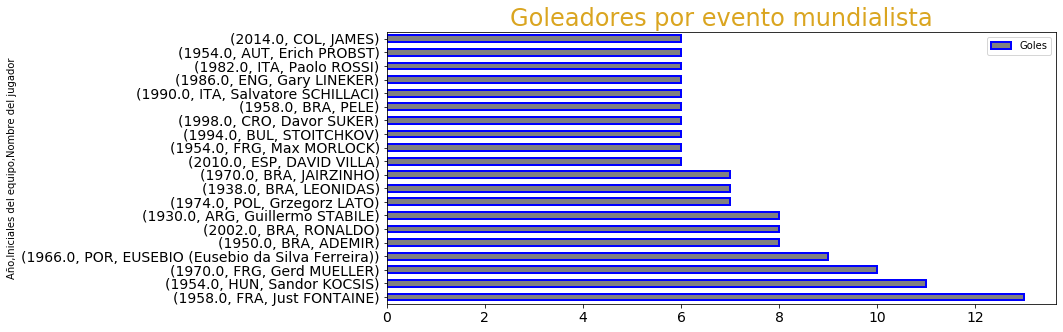

,,,Goles
Año,Iniciales del equipo,Nombre del jugador,
1958,FRA,Just FONTAINE,13
1954,HUN,Sandor KOCSIS,11
1970,FRG,Gerd MUELLER,10
1966,POR,EUSEBIO (Eusebio da Silva Ferreira),9
1950,BRA,ADEMIR,8
2002,BRA,RONALDO,8
1930,ARG,Guillermo STABILE,8
1974,POL,Grzegorz LATO,7
1938,BRA,LEONIDAS,7


In [0]:
jugadores8=pd.merge(jugadores8,partidos2)
def cualquier_año (df,x):
  occio_1=jugadores8[(jugadores8['Año']==x)&(jugadores8['Goles']!=0)] #['Goles'].sum()
  occio_2=jugadores8.groupby(['Año','Iniciales del equipo','Nombre del jugador'])['Goles'].sum().sort_values(ascending=False).head(20).to_frame()
  
  plt.figure(figsize=(12,5))
  occio_2.plot.barh(figsize=(12,5) ,fontsize=14, color='gray', edgecolor='Blue', linewidth=2).set_title("Goleadores por evento mundialista",fontsize=24, color='goldenrod')
  plt.show()
  return occio_2

cualquier_año (jugadores8,1998)

In [0]:
jugadores8.groupby(['Nombre del jugador'])['Goles'].sum().sort_values(ascending=False).to_frame().head()

,Goles
Nombre del jugador,
KLOSE,16
RONALDO,15
Gerd MUELLER,14
Just FONTAINE,13
PELE,12


FONTAINE es el jugador mas goleador en un solo mundial, pero la suma de mas goles en diferentes mundiales es para el aleman klose

In [0]:
def estadistica(p,s,t):
  l1=set(p.index)#Colocamos los indices que son los paises en un conjunto
  l2=set(s.index)#lo mismos
  l3=set(t.index)#lo mismo
  l=list(l1.union(l2,l3))#unimos los conjuntos
  vector=dict()#creamos un diccionario vacío
  for i in l:
    try:#intento hacer esto
      v1=p.loc[i][0]#busca el pais de la lista y copia el valor que posee el primer dataframe
      
    except:#si falla el intento hace esto
      v1=0# Si este no tiene valor le asignara un 0
      """Lo mismo para los siquientes v"""
    try:
      v2=s.loc[i][0]
    except:
      v2=0
    try:
      v3=t.loc[i][0]
    except:
      v3=0
    vector[i]=[v1,v2,v3]#de nuestro diccionario vacío ingresando país por país copiara los valores de los 3v
  return pd.DataFrame(vector,index=['Campeon','Segundo','Tercero']).T.sort_values(by=['Campeon','Segundo','Tercero'],ascending=False)#creamos los indices campeon, segundo y tercero y lo volteamos con T y ordenamos
estadisticas=estadistica(ganadores,segundo,tercero)
estadisticas


,Campeon,Segundo,Tercero
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Argentina,2,3,0
Uruguay,2,0,0
France,1,1,2
Spain,1,0,0
England,1,0,0
Netherlands,0,3,1
Hungary,0,2,0


El maximo campeon de las copas del mundo es Brasil con 5  copas alemania es el pais que mas veces a estado en instancias finales

In [0]:
print(ganados2.sort_values('Puntos',ascending=False).to_string())

                             PJ  PG   E  PP  Puntos
Brazil                      104  70  17  17     227
Germany                     106  66  20  20     218
Italy                        83  45  21  17     156
Argentina                    77  42  14  21     140
Spain                        59  29  12  18      99
England                      62  26  20  16      98
France                       59  28  12  19      96
Netherlands                  50  27  12  11      93
Uruguay                      51  20  12  19      72
Sweden                       46  16  13  17      61
Yugoslavia                   37  16   8  13      56
Mexico                       53  14  14  25      56
Belgium                      41  14   9  18      51
Soviet Union                 31  15   6  10      51
Poland                       31  15   5  11      50
Hungary                      32  15   3  14      48
Portugal                     26  13   4   9      43
Austria                      29  12   4  13      40
Chile       

Brasil vuelve a ser el equipo con mas partidos ganados seguido por muy de cerca por alemania, estableciendo un dominio de dos continentes sur america y europa teniendo a mexico como el primer pais sin estar dentro de estos dos continetes ademas mexico tiene el record de partidos perdidos con 25, el equipo que mas a empatado es Italy el equipo mas ganador Brasil y el equipo que mas partidos jugados es alemania